In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("stores.csv")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

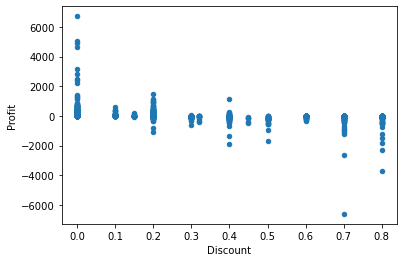

In [3]:
### Finding out if Profit and Discount are related for segment 'consumer'
df.query("Segment=='Consumer'").plot("Discount","Profit",kind='scatter')

In [4]:
df.query("Segment=='Consumer'")[['Discount','Profit']].corr()

,Discount,Profit
Discount,1.000000,-0.214766
Profit,-0.214766,1.000000


In [5]:
## Finding out if Category is affects Profit
df.groupby('Category').agg({'Profit':'mean'})

,Profit
Category,
Furniture,8.699327
Office Supplies,20.327050
Technology,78.752002


In [6]:
## Finding out if quantity sold has any effect on the decision to give discounts
def discount_ind(x):
    if x>0:
        return 1
    else:
        return 0

In [7]:
df['Discount_ind'] = df['Discount'].map(discount_ind)

In [8]:
df[['Quantity','Discount_ind']].head()

,Quantity,Discount_ind
0,2,0
1,3,0
2,2,0
3,5,1
4,2,1


In [9]:
df['Quantity_range']=pd.qcut(df['Quantity'],5)

In [10]:
df.groupby('Quantity_range').agg({'Discount_ind':'mean'})

,Discount_ind
Quantity_range,
"(0.999, 2.0]",0.526507
"(2.0, 3.0]",0.523869
"(3.0, 4.0]",0.513854
"(4.0, 5.0]",0.497561
"(5.0, 14.0]",0.521739


In [14]:
## For certain Segments are some particular categories of products sold more?
pd.crosstab(df['Segment'],df['Category'],margins=True,normalize=False)

Category,Furniture,Office Supplies,Technology,All
Segment,,,,
Consumer,1113,3127,951,5191
Corporate,646,1820,554,3020
Home Office,362,1079,342,1783
All,2121,6026,1847,9994


In [17]:
pd.crosstab(df['Segment'],df['Category'],margins=True,normalize='columns')

Category,Furniture,Office Supplies,Technology,All
Segment,,,,
Consumer,0.524752,0.518918,0.514889,0.519412
Corporate,0.304573,0.302025,0.299946,0.302181
Home Office,0.170674,0.179057,0.185165,0.178407


In [18]:
## Are profits increasing over time
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order_years'] = df['Order Date'].dt.year

<AxesSubplot:xlabel='Order_years'>

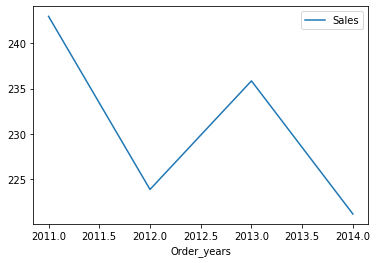

In [19]:
df.groupby("Order_years").agg({'Sales':"mean"}).reset_index().plot("Order_years","Sales",kind="line")